C:\Users\master\AppData\Local\Temp\ipykernel_30576\281280572.py:33: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\master\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


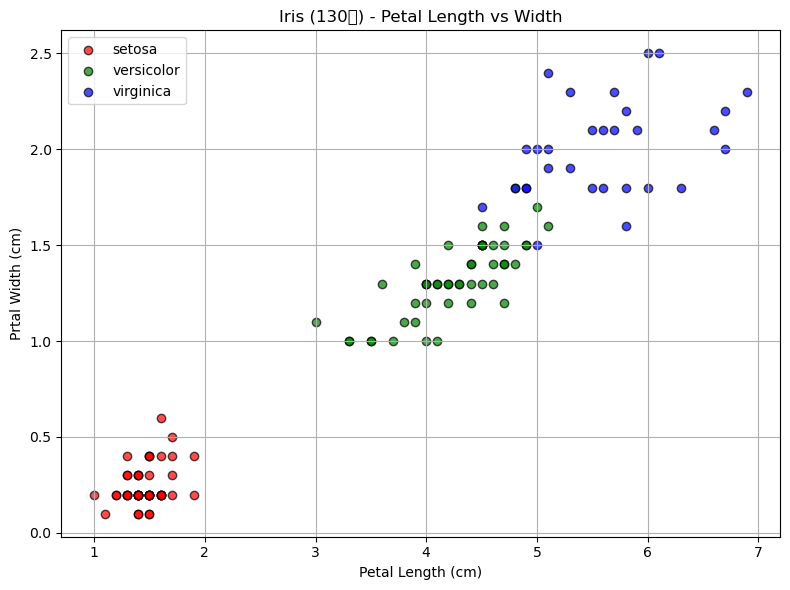

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:130, [2, 3]]
y = iris.target[:130]

df = pd.DataFrame(x, columns=["Petal Length", "Petal Width"])
df["Label"] = y

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names

for i in range(3):
    subset = df[df["Label"] == i]
    plt.scatter(
        subset["Petal Length"],
        subset["Petal Width"],
        color=colors[i],
        label=labels[i],
        alpha=0.7,
        edgecolors='k'
    )
    
plt.xlabel("Petal Length (cm)")
plt.ylabel("Prtal Width (cm)")
plt.title("Iris (130개) - Petal Length vs Width")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:130, [2, 3]]
y = iris.target[:130]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(x, x_train, y_train, k):
    distances = [euclidean_distance(x, xi) for xi in x_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    
    labels, counts = np.unique(k_labels, return_counts=True)
    return labels[np.argmax(counts)]

def compute_accuracy(x_val, y_val, x_train, y_train, k):
    correct = 0
    for x, y in zip(x_val, y_val):
        pred = knn_predict(x, x_train, y_train, k)
        if pred == y:
            correct += 1
    return correct / len(y_val)

np.random.seed(45)
indices = np.random.permutation(len(x))
split = int(0.7 * len(x))

train_idx = indices[:split]
val_idx = indices[split:]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

k_candidates = range(1, 11)
best_k = None
best_acc = 0.0

print("k값별 정확도:")
for k in k_candidates:
    acc = compute_accuracy(x_val, y_val, x_train, y_train, k)
    print(f"k = {k} -> 정확도: {acc:.2f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k
        
print(f"\n최적의 k값은: {best_k} (정확도: {best_acc:.2f})")

k값별 정확도:
k = 1 -> 정확도: 0.95
k = 2 -> 정확도: 0.92
k = 3 -> 정확도: 0.92
k = 4 -> 정확도: 0.92
k = 5 -> 정확도: 0.97
k = 6 -> 정확도: 0.92
k = 7 -> 정확도: 0.92
k = 8 -> 정확도: 0.92
k = 9 -> 정확도: 0.95
k = 10 -> 정확도: 0.92

최적의 k값은: 5 (정확도: 0.97)
